In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn import preprocessing

In [2]:
# We load the data
df = pd.read_csv("datasets/training_1.csv")
df.drop(["DATETIME"],axis=1,inplace=True)
columns = df.columns
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
# df = (df-df.mean())/df.std()
# df.head()

In [4]:
#Normalizations of the signals
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,0.041663,0.326844,0.120893,0.294027,0.474946,0.728796,0.128789,0.362889,0.0,0.988791,...,0.754011,0.444055,0.575244,0.190652,0.769913,0.195089,0.346838,0.097967,0.478234,0.0
1,0.020317,0.319408,0.297909,0.308547,0.638842,0.992383,0.202221,0.365508,0.0,0.989764,...,0.815632,0.443421,0.608323,0.188221,0.775343,0.192696,0.348032,0.096095,0.475637,0.0
2,0.000000,0.315129,0.493043,0.466649,0.795042,1.000000,0.302105,0.347369,0.0,0.983022,...,0.869400,0.443424,0.621653,0.222958,0.835157,0.227449,0.465977,0.096111,0.475659,0.0
3,0.002805,0.319432,0.702160,0.648073,0.926695,1.000000,0.544778,0.324639,0.0,0.974574,...,0.920844,0.450190,0.649743,0.521689,0.206488,0.522436,0.552520,0.101490,0.483118,0.0
4,0.035899,0.334301,0.923501,0.895404,0.770673,1.000000,0.858088,0.318617,0.0,0.972335,...,0.983674,0.461483,0.696660,0.530118,0.208966,0.530791,0.562153,0.108498,0.492837,0.0


In [5]:
df.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

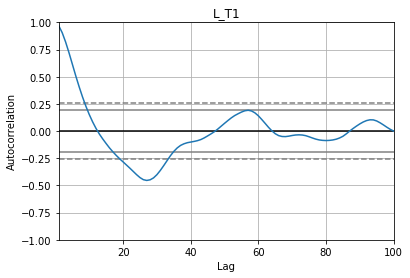

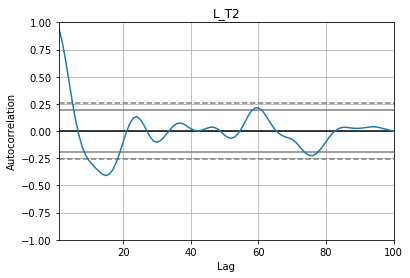

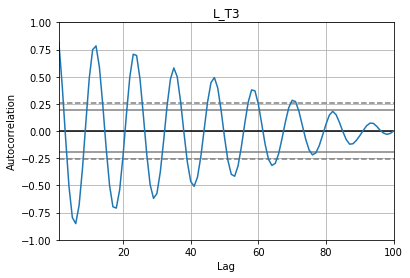

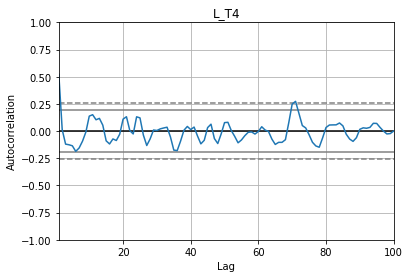

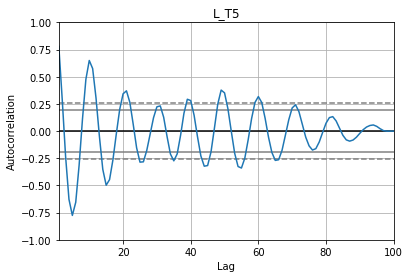

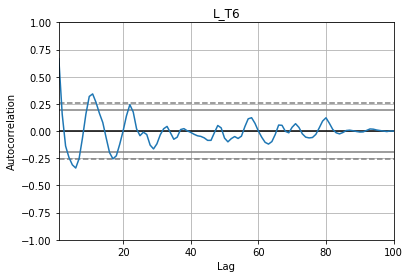

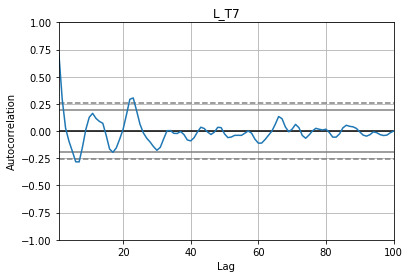

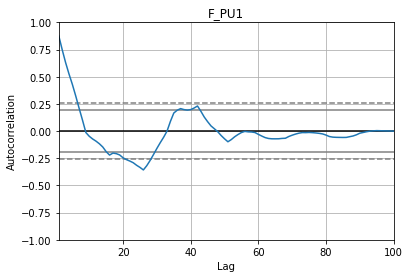

/home/uyatashi/.local/lib/python3.6/site-packages/pandas/plotting/_misc.py:629: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0


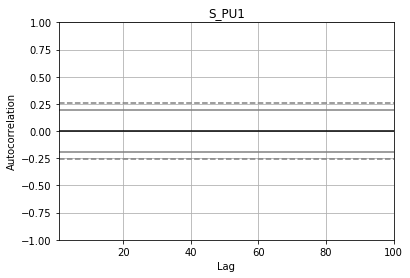

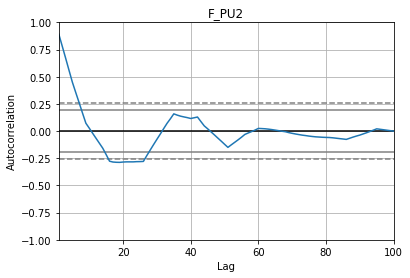

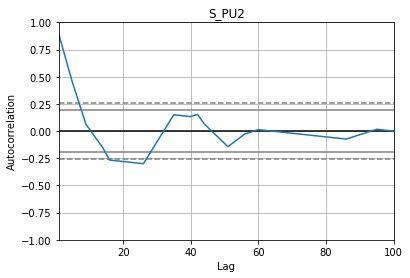

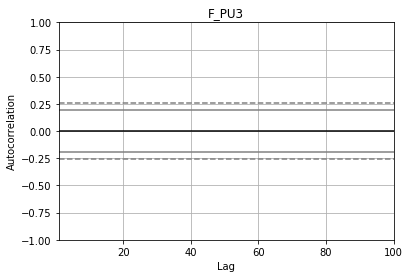

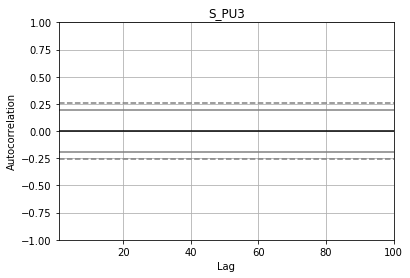

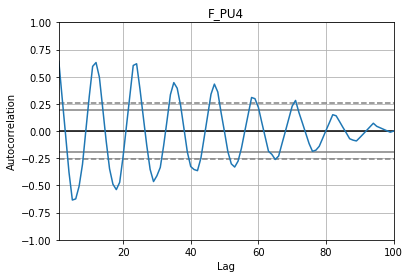

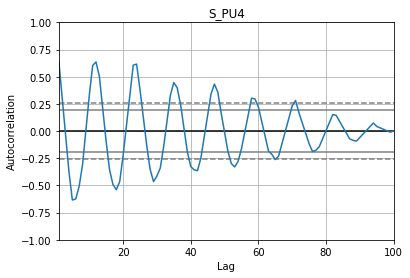

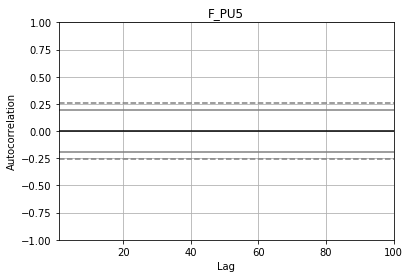

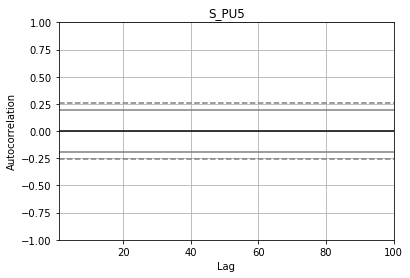

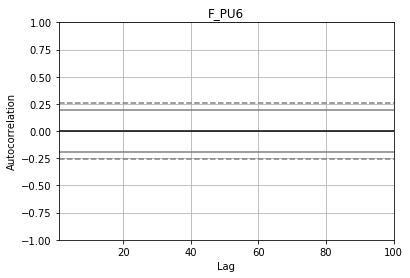

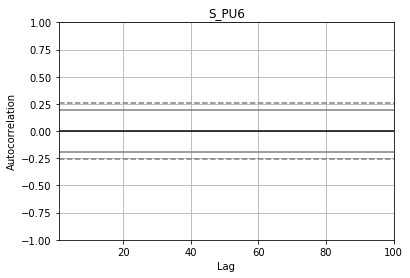

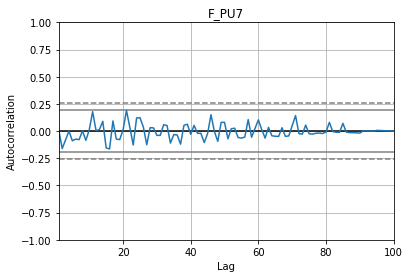

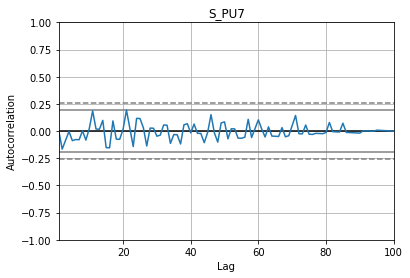

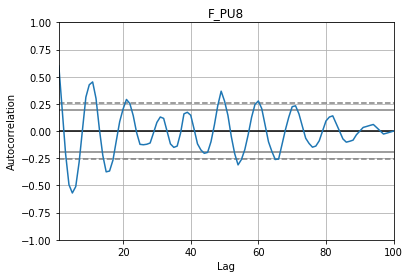

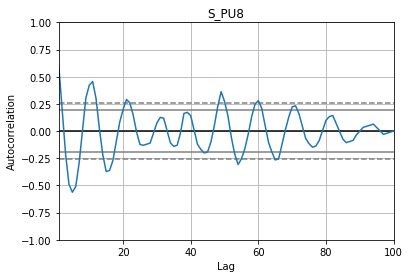

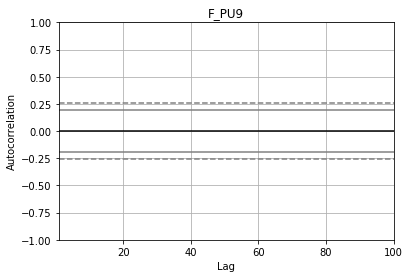

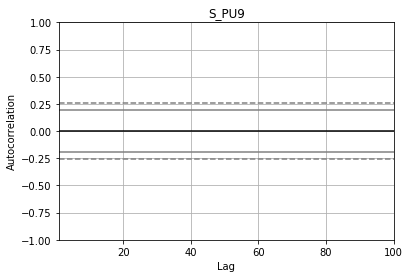

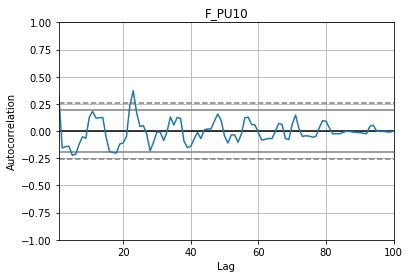

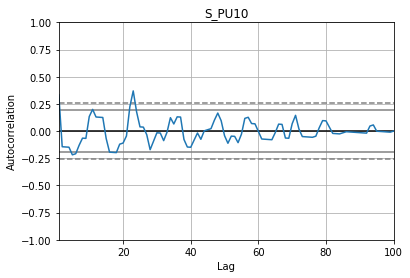

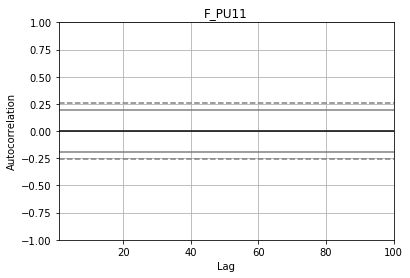

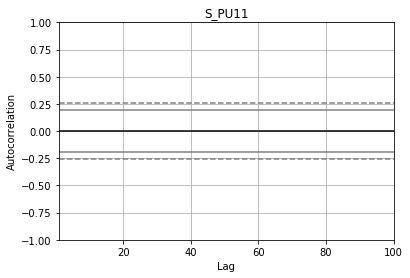

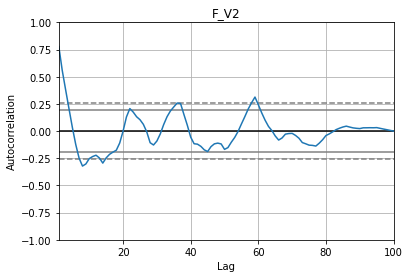

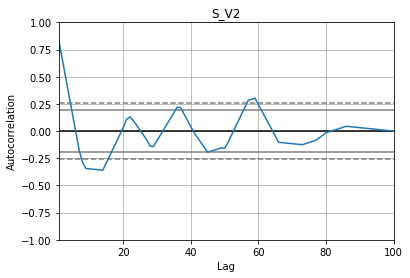

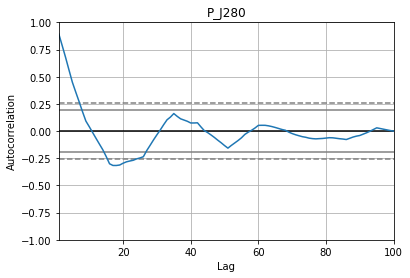

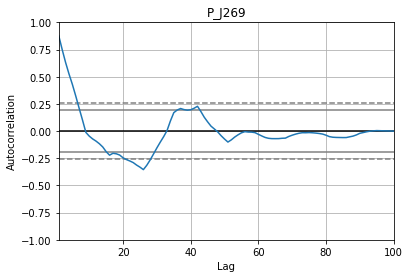

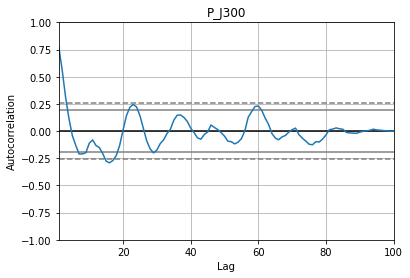

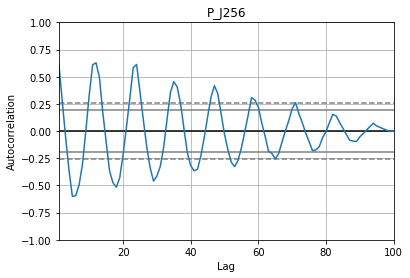

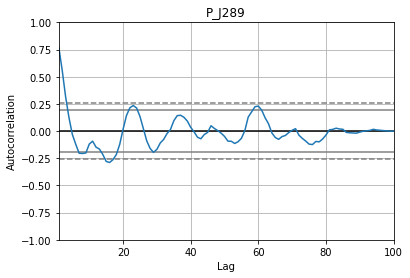

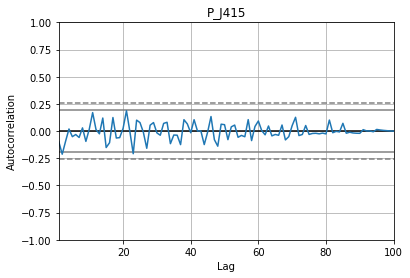

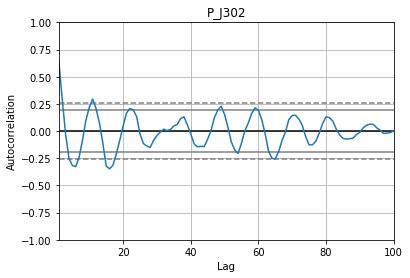

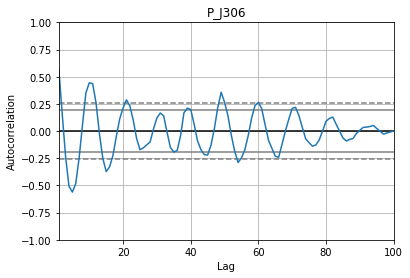

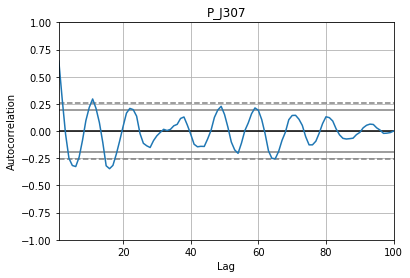

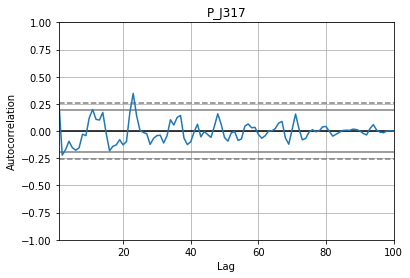

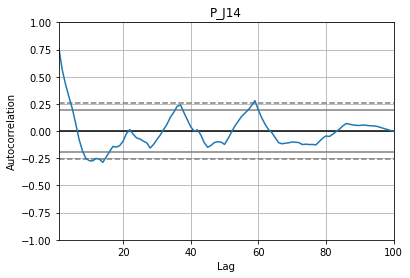

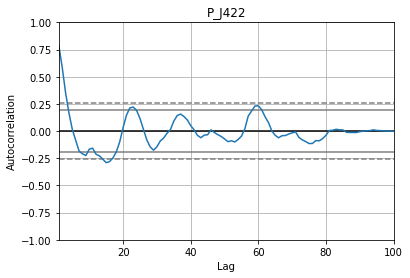

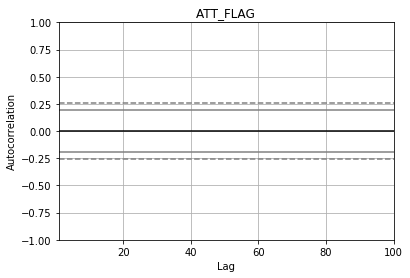

In [6]:
for column in df.columns:
    autocorrelation_plot(df[column][:100])
    plt.title(column)
    plt.show()

In [7]:
for column in df.columns:
    # split into train and test sets
    X = df[column].values
    size = int(len(X) * 0.9)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(10,0,0))
        model_fit = model.fit(disp=False)
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    
    
#     print(X)
#     print(train)
#     print(test)
#     print(train.shape)
#     print(test.shape)
    break

/home/uyatashi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/uyatashi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/uyatashi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/uyatashi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/uyatashi/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to c

KeyboardInterrupt: 

In [7]:
#Significant correlation until a lag of 10, so we choose order of 10 for ARMA
model = ARIMA(df[column], order=(10,0,0))
model_fit = model.fit(disp=0,transparams=True)

In [8]:
model_fit.forecast()[0]


array([0.49776502])

In [4]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


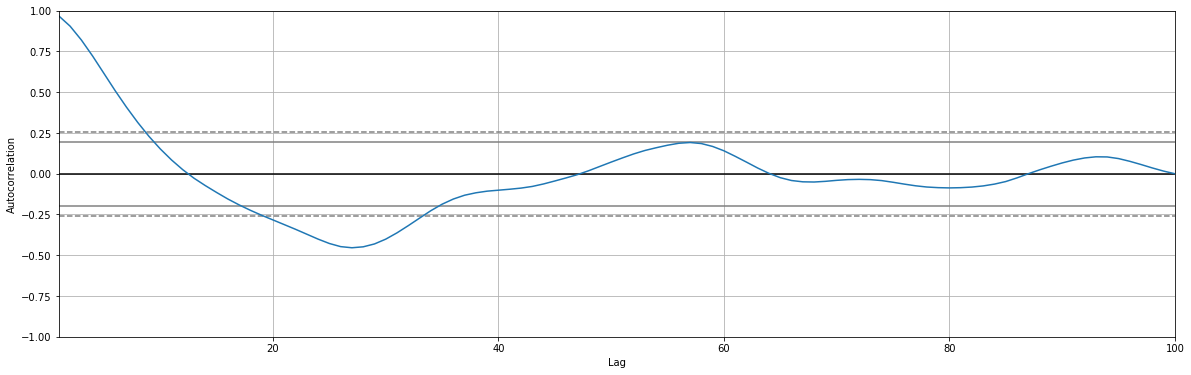

In [6]:
plt.figure(figsize=(20, 6))
#dim = np.arange(0,100,1)
#plt.xticks(dim)
autocorrelation_plot(df["L_T1"][:100])

In [8]:
d = 0
p = q = range(0, 101)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, q))
pdq

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [9]:
AIC = []
for params in pdq:
    params = (params[0],0,params[1])
    try:    
        model = ARIMA(df[column], order=params)
        results = model.fit()
    except ValueError:
        pass
    #print(params)
    #print(results.aic, "\n")
    AIC.append((params,results.aic))

KeyboardInterrupt: 

In [41]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   L_T1   No. Observations:                 8761
Model:                    ARMA(10, 0)   Log Likelihood                8314.328
Method:                       css-mle   S.D. of innovations              0.094
Date:                Tue, 29 May 2018   AIC                         -16604.656
Time:                        20:16:25   BIC                         -16519.719
Sample:                             0   HQIC                        -16575.716
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0007      0.028     -0.024      0.981      -0.056       0.054
ar.L1.L_T1      1.9733      0.011    185.207      0.000       1.952       1.994
ar.L2.L_T1     -1.2320      0.024    -52.225    

In [ ]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())